# Exploring Geotaste codebase

In [23]:
import sys; sys.path.insert(0,'..')
from geotaste import *
from inheritance_explorer import ClassGraphTree

## Review of three major pieces of code

### Datasets

Code all in [datasets.py](../geotaste/datasets.py). The base class is `Dataset`, with some basic methods for reading in the base CSVs (members/events/books/etc).

In [33]:
# Code survey
# Dataset??

Many other dataset classes subclass from it:

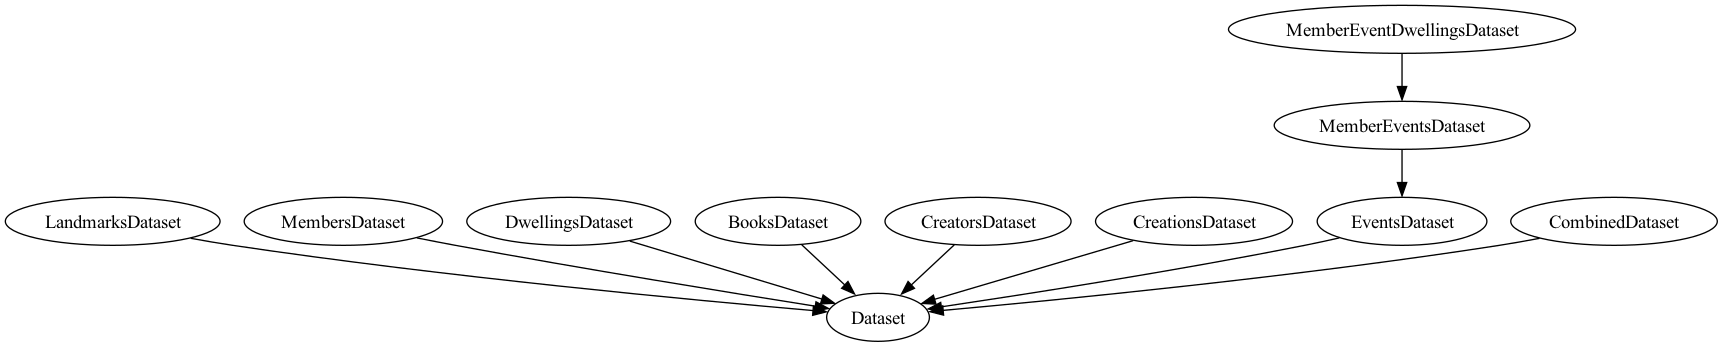

In [3]:
cgt = ClassGraphTree(Dataset)
cgt.show_graph()

Each of these has extended the data method:

In [4]:
# landmarks get-data method
LandmarksDataset??

Init signature: LandmarksDataset(path: str = '', cols: list = [], **kwargs)
Docstring:      <no docstring>
Source:        
class LandmarksDataset(Dataset):
    path = PATHS.get('landmarks')
    url = URLS.get('landmarks')
    cols_q = ['lat', 'lon']
    
    @cached_property
    def data(self):
        df=super().data
        df['arrond_id'] = [
            determine_arrond(lat,lon)
            for lat,lon in zip(df.lat, df.lon)
        ]

        df['tooltip'] = [
            f'''{row.landmark}\n{row.address}\n{'Paris '+row.arrond_id+'ᵉ' if row.arrond_id.isdigit() else ''}'''.strip().replace('\n','<br>')
            for i,row in df.iterrows()
        ]

        return df
File:           ~/github/geotaste/geotaste/datasets.py
Type:           type
Subclasses:     

In [5]:
# membmers
MembersDataset??

Init signature: MembersDataset(path: str = '', cols: list = [], **kwargs)
Docstring:      <no docstring>
Source:        
class MembersDataset(Dataset):
    url:str = URLS.get('members')
    path:str = PATHS.get('members')
    sep:str = ';'
    cols:list = [
        'uri',
        'name',
        'sort_name',
        'title',
        'gender',
        'is_organization',
        'has_card',
        'birth_year',
        'death_year',
        'membership_years',
        'viaf_url',
        'wikipedia_url',
        'nationalities',
        # 'addresses',
        # 'postal_codes',
        # 'arrondissements',
        # 'coordinates',
        'notes',
        'updated'
    ]
    cols_sep:list = [
        'nationalities',
        'membership_years'
    ]
    cols_q = [
        'birth_year',
        'death_year',
    ]
    

    @cached_property
    def data(self):
        df=super().data
        df['member'] = df['uri'].apply(get_member_id)
        df['membership_years'] = [[int(y) for y in x

The result is quick access to data as pandas dataframes:

In [11]:
LandmarksDataset().data

2023-08-31 12:58:20.743 | columns in /Users/ryan/geotaste_data/landmarks.csv are ['landmark', 'address', 'lat', 'lon', 'desc'] | data | datasets.py:54


,landmark,address,lat,lon,desc,arrond_id,tooltip
0,Shakespeare and Company,12 rue de l'Odéon,48.851076,2.338504,,6,Shakespeare and Company<br>12 rue de l'Odéon<b...
1,American Library in Paris,10 rue de l’Elysée,48.869550,2.317233,,8,American Library in Paris<br>10 rue de l’Elysé...
2,Gertrude Stein's Salon,27 rue de Fleurus,48.846997,2.329269,,6,Gertrude Stein's Salon<br>27 rue de Fleurus<br...
3,Tour Eiffel,,48.858963,2.294481,,7,Tour Eiffel<br><br>Paris 7ᵉ
4,Café de Flore,172 boulevard Saint-Germain,48.854822,2.332776,,6,Café de Flore<br>172 boulevard Saint-Germain<b...
5,Les Deux Magots,6 place Saint-Germain des Prés,48.854490,2.333149,,6,Les Deux Magots<br>6 place Saint-Germain des P...
6,Le Dôme Café,108 boulevard du Montparnasse,48.844815,2.329831,,6,Le Dôme Café<br>108 boulevard du Montparnasse<...
7,Closerie des Lilas,171 boulevard du Montparnasse,48.840610,2.336172,,6,Closerie des Lilas<br>171 boulevard du Montpar...
8,Dingo Bar,10 rue Delambre,48.842011,2.328394,,14,Dingo Bar<br>10 rue Delambre<br>Paris 14ᵉ
9,Natalie Barney's Salon,20 rue Jacob,48.855275,2.335506,,6,Natalie Barney's Salon<br>20 rue Jacob<br>Pari...


Also ensures that the correct columns are de-segmented and/or quantized or not:

In [17]:
MembersDataset??

Init signature: MembersDataset(path: str = '', cols: list = [], **kwargs)
Docstring:      <no docstring>
Source:        
class MembersDataset(Dataset):
    url:str = URLS.get('members')
    path:str = PATHS.get('members')
    sep:str = ';'
    cols:list = [
        'uri',
        'name',
        'sort_name',
        'title',
        'gender',
        'is_organization',
        'has_card',
        'birth_year',
        'death_year',
        'membership_years',
        'viaf_url',
        'wikipedia_url',
        'nationalities',
        # 'addresses',
        # 'postal_codes',
        # 'arrondissements',
        # 'coordinates',
        'notes',
        'updated'
    ]
    cols_sep:list = [
        'nationalities',
        'membership_years'
    ]
    cols_q = [
        'birth_year',
        'death_year',
    ]
    

    @cached_property
    def data(self):
        df=super().data
        df['member'] = df['uri'].apply(get_member_id)
        df['membership_years'] = [[int(y) for y in x

### Figures

Code all in [figs.py](../geotaste/figs.py). The base class is `FigureFactory`.

In [9]:
# code survey
# FigureFactory??

Each figure is a subclass of this original figure class:

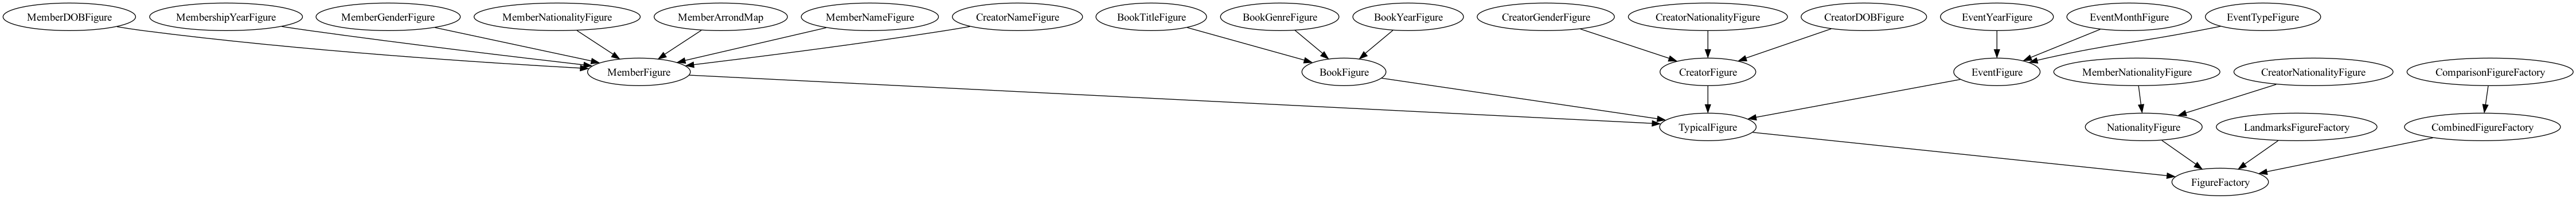

In [29]:
cgt = ClassGraphTree(FigureFactory)
cgt.show_graph()

Each of these should work independently:

In [30]:
MemberDOBFigure().plot()

In [31]:
MemberGenderFigure().plot()

### Components

Code in [components.py](../geotaste/components.py) and [panels.py](../geotaste/panels.py).

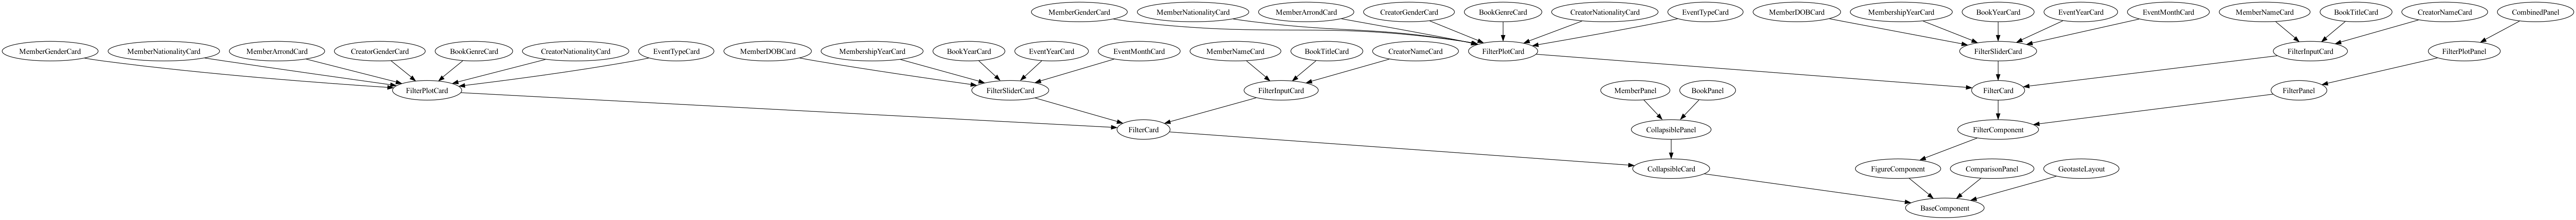

In [24]:
cgt = ClassGraphTree(BaseComponent)
cgt.show_graph()